In [3]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [6]:
# Provide Twiteer developer key

consumer_key = "BBuwXedBrxTItv0mmp2NxnVDH"
consumer_secret = "XCpejfJQ9jq8vRgvEpeSLn7FVK4Ar9x5XLcVoYEQOvfG0ISBGu"
access_token = "275071458-kIqtmzz6R3rM9ThBvAEz8sf9FtuJRB4kuTqhCYcF"
access_token_secret = "W6jbyrGoJPZ9Ztss36bPtyNUILq0iNKnvjvT5HbWQdnK7"

# calling API

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Provide the keyword you want to pull the data e.g. "Python".
keyword = "#Covid-19"

In [7]:
# Extracts 50 tweets from related to #Covid-19
posts = api.search(keyword, count=50, lang='en', exclude='retweets', tweet_mode='extended')

In [8]:
#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) AstraZeneca Jab Works Against Mutant COVID; JNJ Asks For US Approval: Live Updates | ZeroHedge

Friday is all about vaccines as cases and deaths decline globally...
 https://t.co/015325GHVr

2) The CartoVista team has created an interactive daily updated map highlighting the distribution of #Covid19 #vaccines around the world. 

https://t.co/DqEUfCksQw

#Vaccination #Pfizer #Moderna #Atrazeneca #StaySafe #WebMapping https://t.co/S39pCVABwy

3) Cinemas in Beijing were ordered Thursday to limit seating capacity to 50 percent during the upcoming Lunar New Year holiday. The decision adds to local industry worries that recent flareups of COVID-19 cases could dampen earnings during the biggest period for China’s box office. https://t.co/TXZGTcWSaZ

4) People are scanning for signals of what’s next in a post-COVID-19 landscape. OOH provides its voice as a massive public canvas for securing a leadership position and building confidence.
https://t.co/H6YlnwDpDI #No

In [9]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['tweets'])
# Show the first 5 rows of data
df.head()

,tweets
0,AstraZeneca Jab Works Against Mutant COVID; JN...
1,The CartoVista team has created an interactive...
2,Cinemas in Beijing were ordered Thursday to li...
3,People are scanning for signals of what’s next...
4,"For people living in conflict areas, access to..."


In [10]:
def gen(row):
    
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    tweet = row

    #Removes unicode strings like "\u002c" and "x96" 
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweet)       
    tweet = re.sub(r'[^\x00-\x7f]',r'',tweet)
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #remove numbers
    #tweet = ''.join([i for i in tweet if not i.isdigit()]) 
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    #Removing Punctuation
    tweet = re.sub(r'[^\w\s]','',tweet)
    
    tweet = tweet.strip('\'"')
    
    row = tweet
    return row

In [11]:
def stopw(row):
    from nltk.corpus import stopwords
    
    tweet = row
    #remove stop words
    stop = stopwords.words('english')
    tweet = ' '.join([x for x in tweet.split() if x.lower() not in stop])
    
    row = tweet
    return row    

In [12]:
def lemma(row):
    
    tweet = row
    #lemma
    from textblob import Word
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])
    
    row = tweet
    return row    

In [13]:
def stem(row):
    from textblob import Word
    tweet = row
    stemmer
    st = PorterStemmer()
    tweet=" ".join([st.stem(word) for word in tweet.split()])
    
    row = tweet
    return row       

In [14]:
def low(row):
    
    tweet = row
    #Lower case
    tweet = tweet.lower()
    row = tweet
    return row

In [15]:
def dig(row):
    
    tweet = row
    #remove numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()]) 
    row = tweet
    return row    

In [16]:
dfcleaned = df.copy()

In [17]:
dfcleaned['tweets'] = dfcleaned['tweets'].apply(gen).apply(low).apply(dig).apply(stopw)

In [18]:
dfcleaned

,tweets
0,astrazeneca jab works mutant covid jnj asks us...
1,cartovista team created interactive daily upda...
2,cinemas beijing ordered thursday limit seating...
3,people scanning signals whats next post covid ...
4,people living conflict areas access health car...
5,bangladeshi dorm resident tests positive covid...
6,wear mask even without symptoms expose others ...
7,checkup feb new covid cases reported benningto...
8,location covid workplace outbreaks toronto rel...
9,im disappointed approach democrats congress ch...


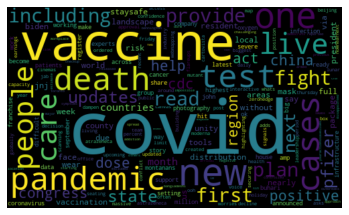

In [19]:
# word cloud visualization
allWords = ','.join([twts for twts in dfcleaned['tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<FreqDist with 592 samples and 742 outcomes>


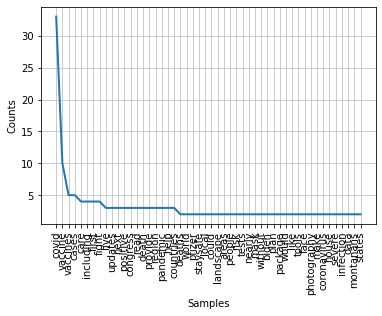

<function matplotlib.pyplot.show(*args, **kw)>

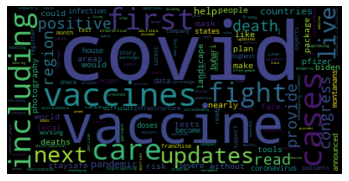

In [20]:
# Import Library for computing frequency
import nltk
from nltk.corpus import webtext
#nltk.download('webtext')
#wt_sentences = webtext.sents(allWords)
#wt_words = webtext.words(allWordsords)

%matplotlib inline

from nltk.probability import FreqDist
#from nltk.corpus import stopwords
import string

allWords_words = allWords.split()

len(allWords_words)
#len(wt_words)

frequency_dist = nltk.FreqDist(allWords_words)
print(frequency_dist)

sorted_frequency_dist =sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
sorted_frequency_dist

large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])

frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50, cumulative=False)

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show